In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
smp.init_printing(use_latex=True)

plt.rc('font', size=20)
figureSizeConst = (13, 6.7)

In [37]:
class Antiderivative:
    
    def __init__(self, name, f, xLeft, numBlocks):
        self.f = f
        self.xLeft = xLeft
        self.numBlocks = numBlocks
        self.name = name
        #print('Пустой объект класса ' + self.__class__.__name__ + ' создан.')

# Левая граница интегрирования
    def setXLeft(self, xLeft):
        self.xLeft = xLeft
    
# Коэффициенты функции f(t)
    def setCoeffs(self, coeffs):
        self.coeffs = coeffs

# Возвращает шаг сетки, точки расчетной сетки и длину сетки
    def setGrid(self, x):
        x = float(x)
        gridPoints = np.linspace(self.xLeft, x, self.numBlocks + 1)
        gridLength = len(gridPoints)
        h = (x - self.xLeft)/self.numBlocks
        return h, gridPoints, gridLength    
    
    def calculate(self, x):
              
        h, gridPoints, gridLength = self.setGrid(x)

        step = 0
        if isinstance(self, AntiderivativeMidRectangle) == True:
            step = h / 2
            
        value = 0.
        values = []    
        for point in gridPoints:
            values.append(self.f(point + step))
            
        value = np.dot(self.coeffs, values)
        return value * h

In [38]:
class AntiderivativeRightRectangle(Antiderivative):
    
    def __call__(self, x):        
        
        self.setCoeffs([0] + [1] * self.numBlocks)
        
        return super().calculate(x)

In [39]:
class AntiderivativeLeftRectangle(Antiderivative):
    
    def __call__(self, x):
        
        self.setCoeffs([1] * self.numBlocks + [0])
        
        return super().calculate(x)

In [40]:
class AntiderivativeMidRectangle(Antiderivative):
    
    def __call__(self, x):
        
        self.setCoeffs([1] * self.numBlocks + [0])
        
        return super().calculate(x)

In [41]:
class AntiderivativeTrapezium(Antiderivative):        
                  
    def __call__(self, x):
        
        self.setCoeffs([1/2] + [1] * (self.numBlocks - 1) + [1/2])
        
        return super().calculate(x)

In [42]:
class AntiderivativeSimpson(Antiderivative):        
                  
    def __call__(self, x):
        
        self.setCoeffs([1 / 3] + [4 / 3, 2 / 3] * (int(self.numBlocks / 2) - 1) + [4 / 3, 1 / 3]) 
        
        return super().calculate(x)

In [43]:
# Пример использования методов интегрирования

x0 = 2
xSym = smp.Symbol('x')

fSym = smp.sin(xSym ** 2)

formulas = [AntiderivativeRightRectangle, AntiderivativeLeftRectangle, AntiderivativeMidRectangle, \
            AntiderivativeTrapezium, AntiderivativeSimpson]

for formula in formulas:
    F = formula(name='Первообразная ' + fSym.__str__(), \
                            f=smp.lambdify(xSym, fSym), \
                                  xLeft=0., numBlocks=100)
    print('%s, значение в точке %.2f: %.5f ' % (F.name, x0, F(x0)))

Первообразная sin(x**2), значение в точке 2.00: 0.79712 
Первообразная sin(x**2), значение в точке 2.00: 0.81226 
Первообразная sin(x**2), значение в точке 2.00: 0.80482 
Первообразная sin(x**2), значение в точке 2.00: 0.80469 
Первообразная sin(x**2), значение в точке 2.00: 0.80478 


In [44]:
# Сравнение с аналитическим значением

from IPython.display import display

functions = [smp.sin(xSym ** 2), smp.cos(smp.sin(xSym)), \
             smp.exp(smp.cos(smp.sin(xSym))), smp.log(xSym + 3), \
             smp.sqrt(xSym + 3)]
# функция, переменная, пределы интегрирования, соответственно
valueAnalyticalSym = smp.integrate(fSym, (xSym, F.xLeft, x0))
display('Аналитическое символьное значение: %.6e' % valueAnalyticalSym)

valueAnalytical = float(valueAnalyticalSym)
print('Аналитическое значение: %.2e' % valueAnalytical)

valueNum = F(x0) # вызов ранее созданного объекта для представления первообр.
print('Численное значение: %.2e' % valueNum)

error = np.fabs(valueNum - valueAnalytical)
print('Ошибка: %.2e' % error)

'Аналитическое символьное значение: 8.047765e-01'

Аналитическое значение: 8.05e-01
Численное значение: 8.05e-01
Ошибка: 5.34e-08


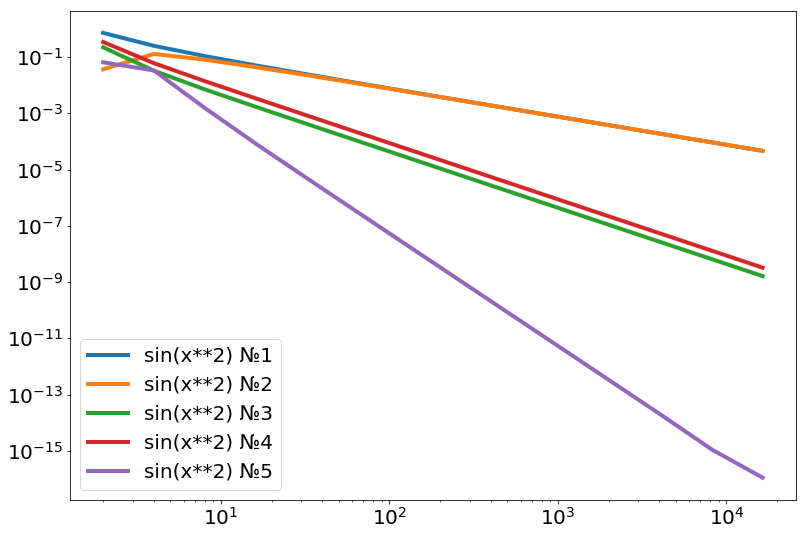

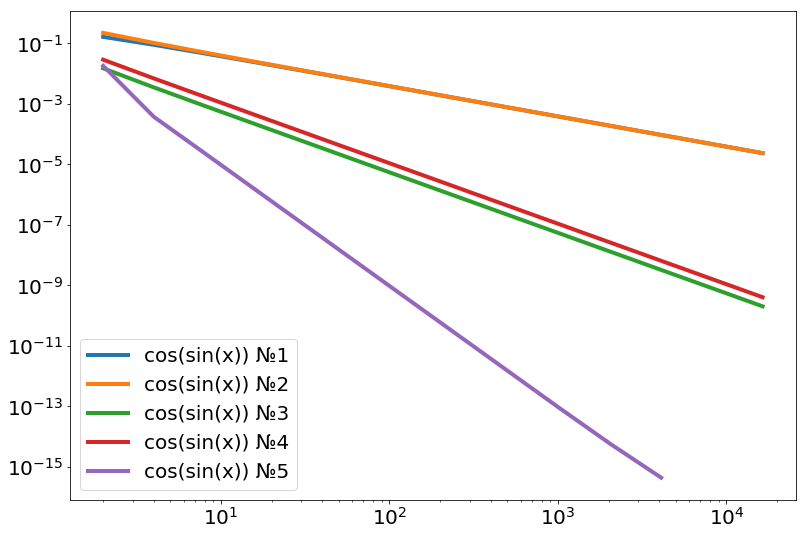

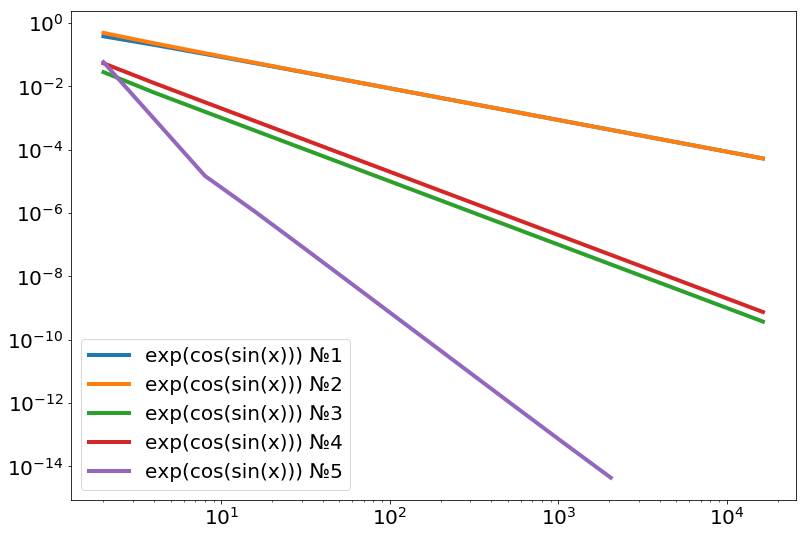

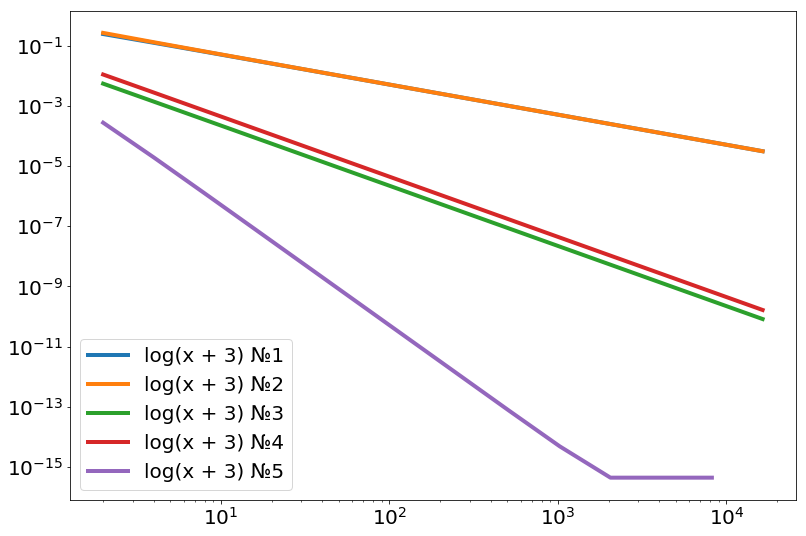

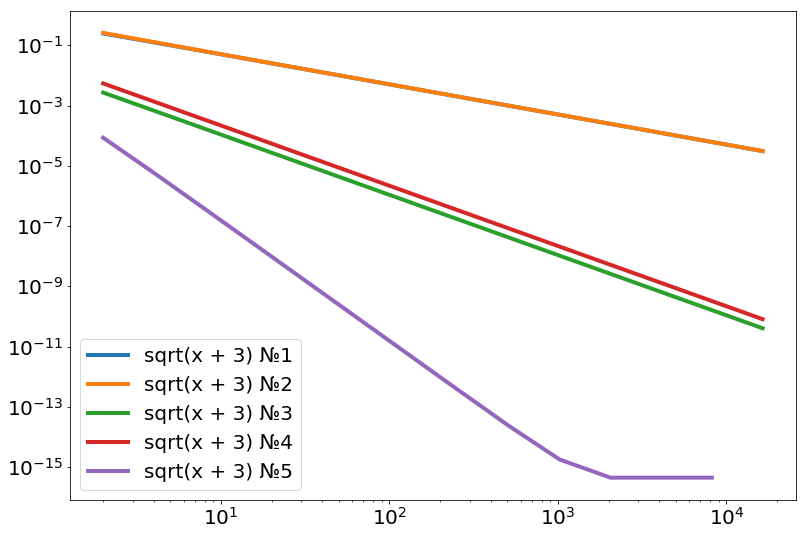

In [47]:
# Графики зависимости абсолютной ошибки интегрирования от количества отрезков разбиения

steps = [2 ** (n + 1) for n in range(14)]
yData = []
xLeft = 0
k = 0  # Номер формулы интегрирования для отображения на графике

for func in functions:
    plt.figure(figsize=(13, 9))
    
    valueAnalytical = float(smp.integrate(func, (xSym, F.xLeft, x0)))
    
    for formula in formulas:
        
        for step in steps:
            F = formula(func.__str__(), smp.lambdify(xSym, func), xLeft, step)
            
            error = np.fabs(F(x0) - valueAnalytical)
            
            yData.append(error)
        
        k +=1
            
        plt.loglog(steps, yData, '-', linewidth=4, label=F.name + ' №' + str(k))
        yData.clear()
        plt.legend(loc='best')
    
    k = 0

plt.show()